<a href="https://colab.research.google.com/github/aborbala/tree-canopy/blob/main/04_01_Compare_model_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Model Metrics

This script reads metrics from JSON files in a specified directory,
processes the data, and plots the metrics for comparison across different models.
Each JSON file is expected to have lines of JSON objects representing metrics at different iterations.

These metrics are generated during the training of models using Detectron2.
The metrics are saved at the end of the training process and include various performance indicators such as loss, accuracy, precision, recall, and other evaluation metrics.

In [2]:
# Check if running in Google Colab
try:
  from google.colab import drive
  running_in_colab = True
except ImportError:
  running_in_colab = False

In [3]:
if running_in_colab:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


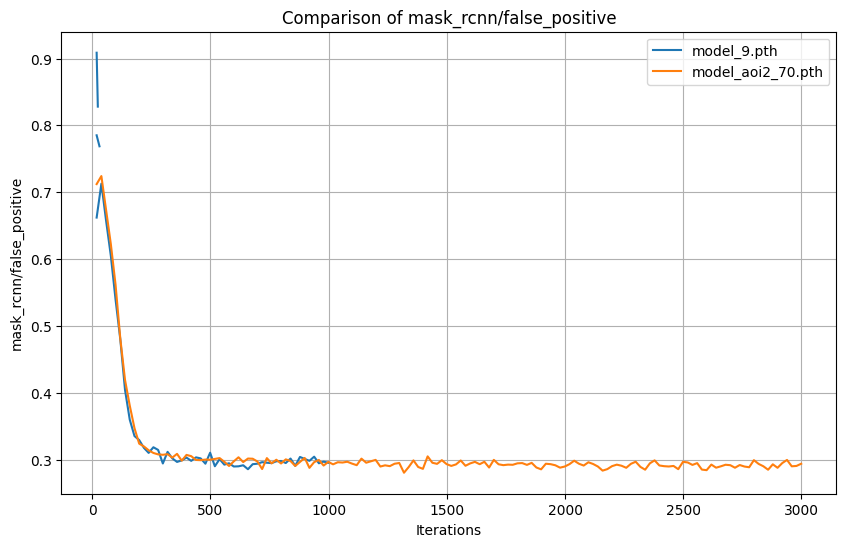

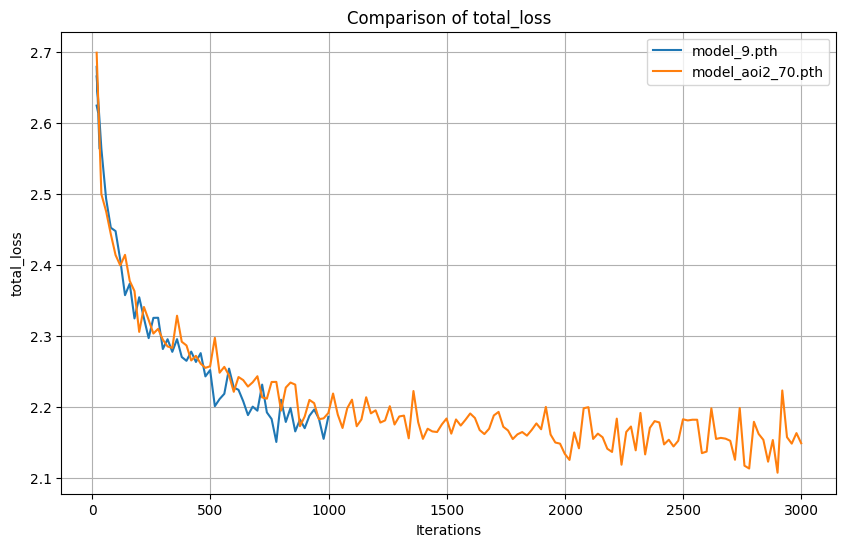

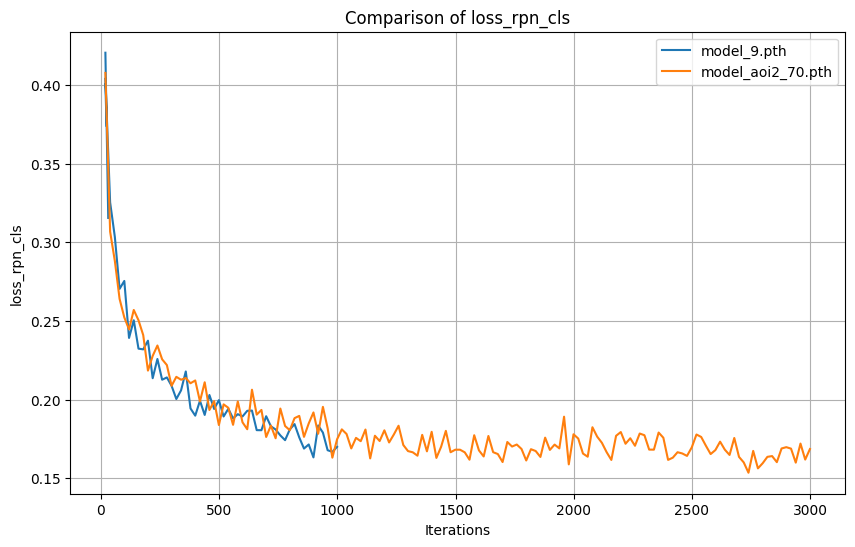

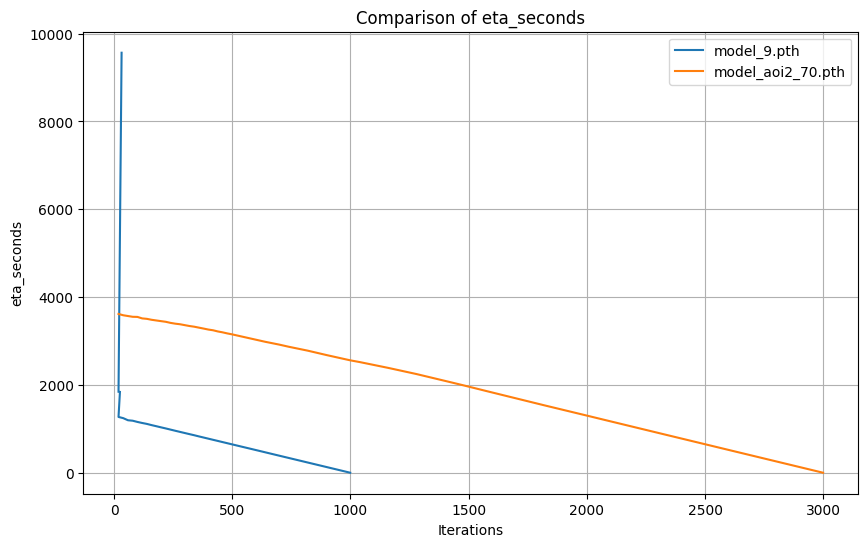

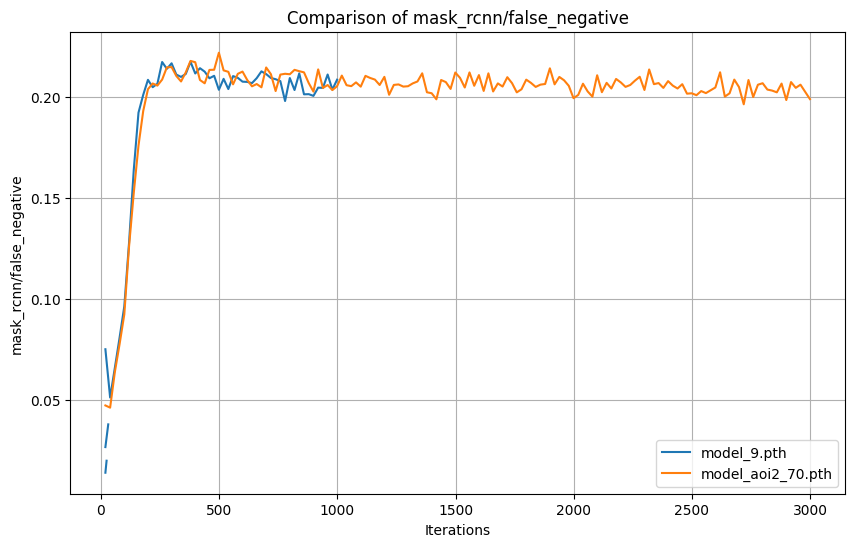

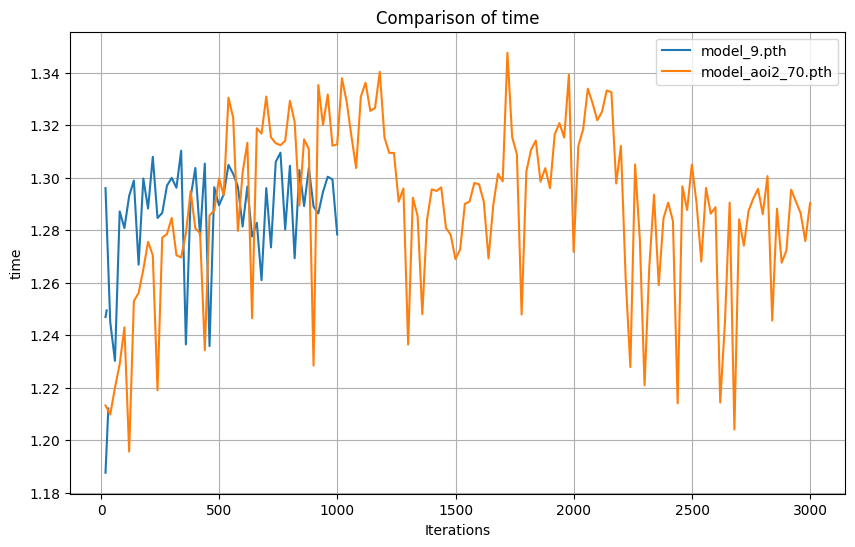

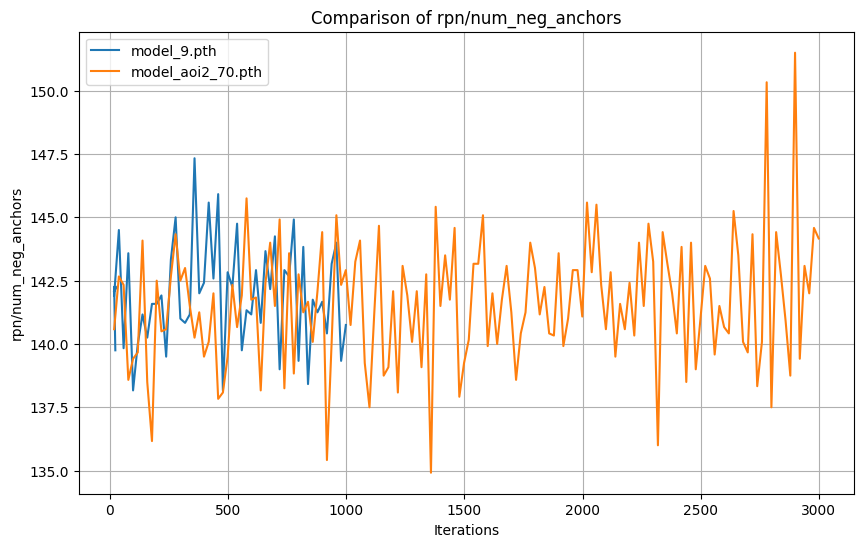

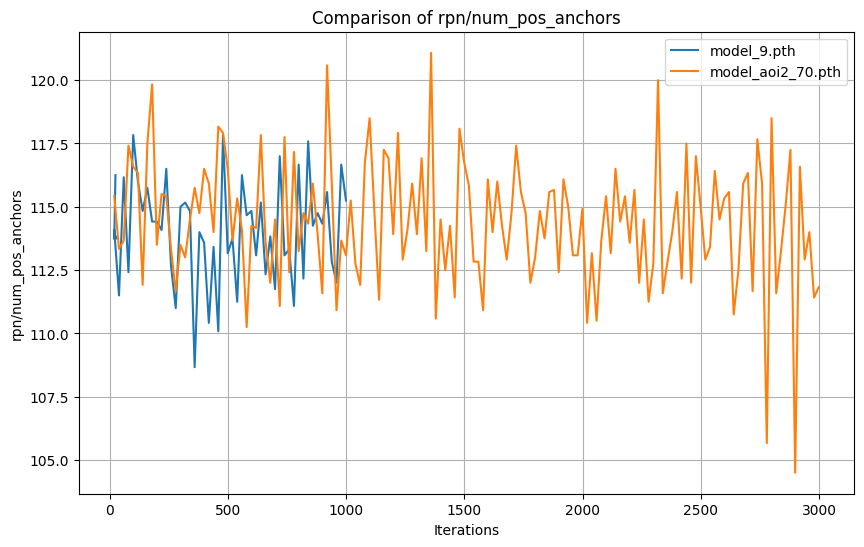

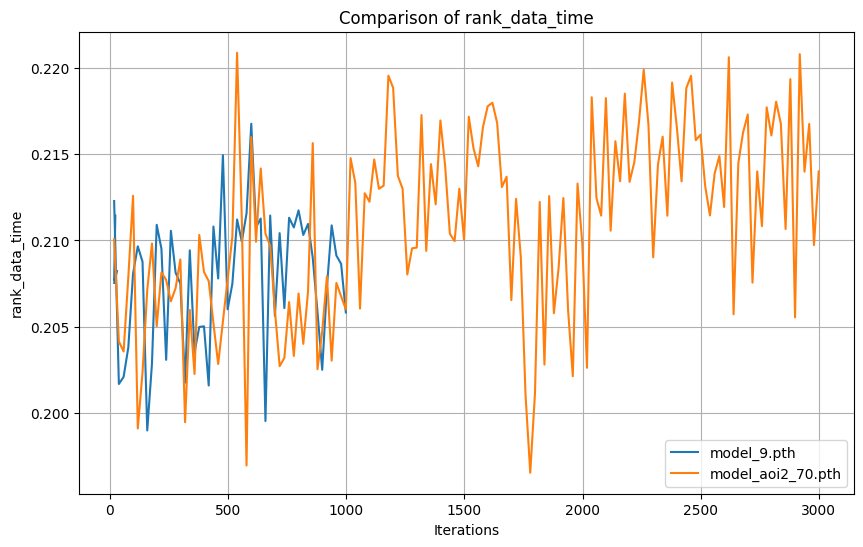

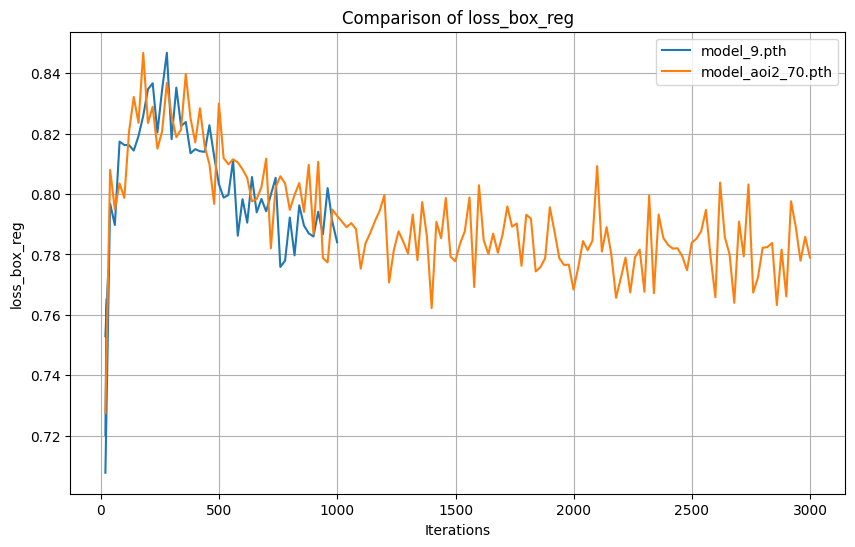

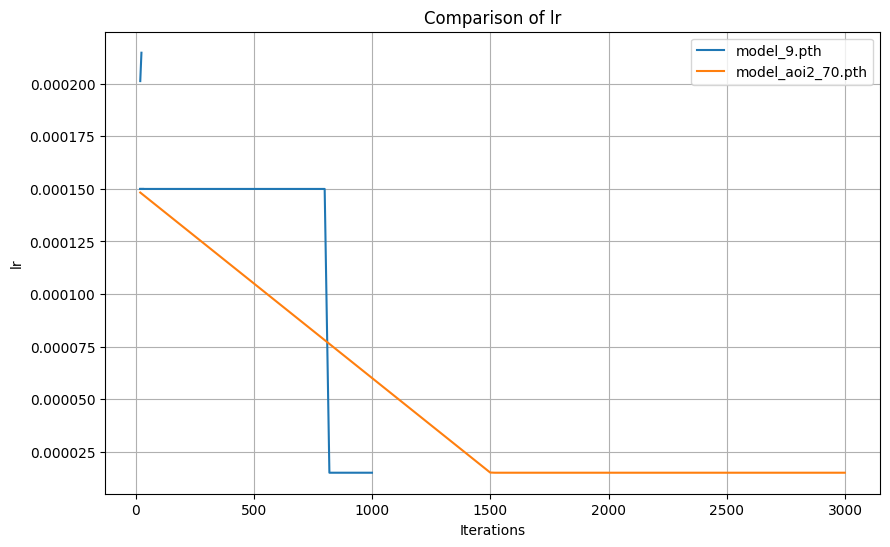

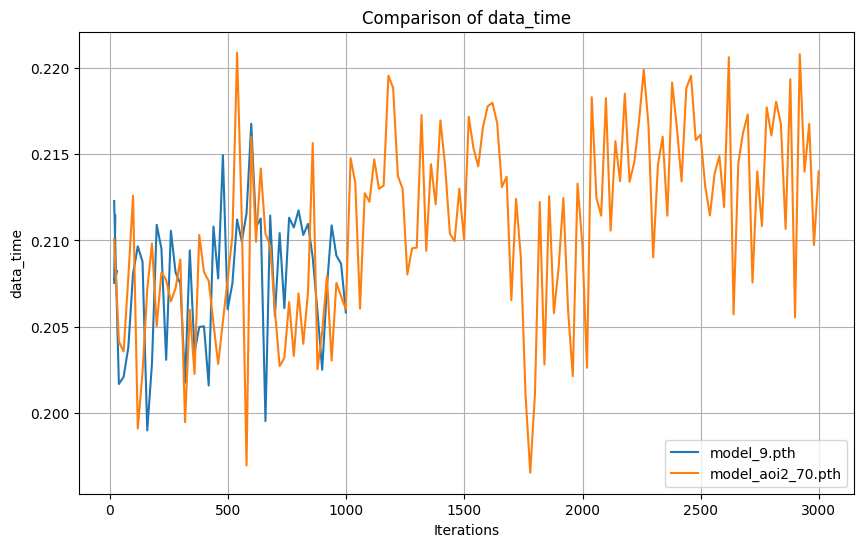

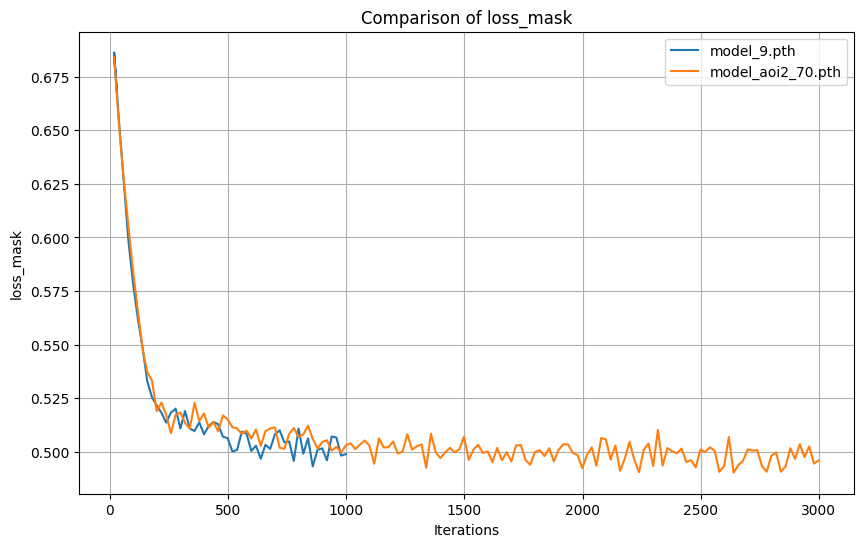

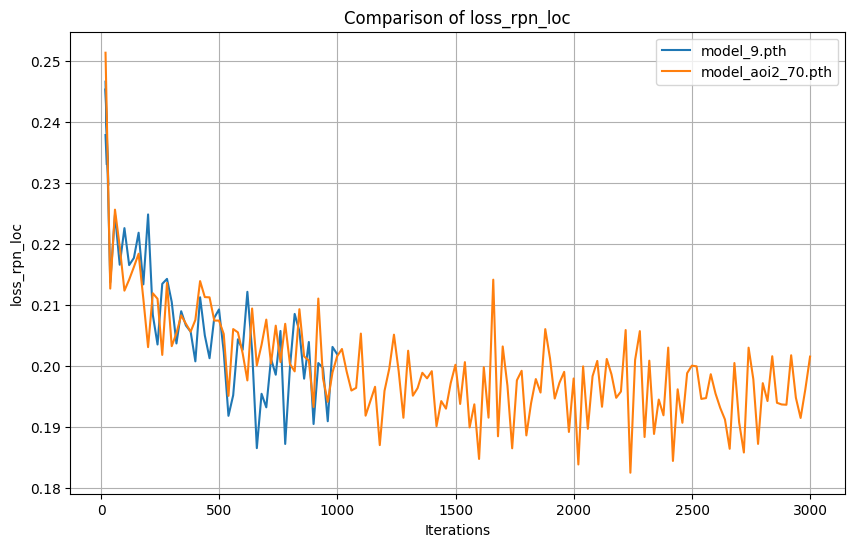

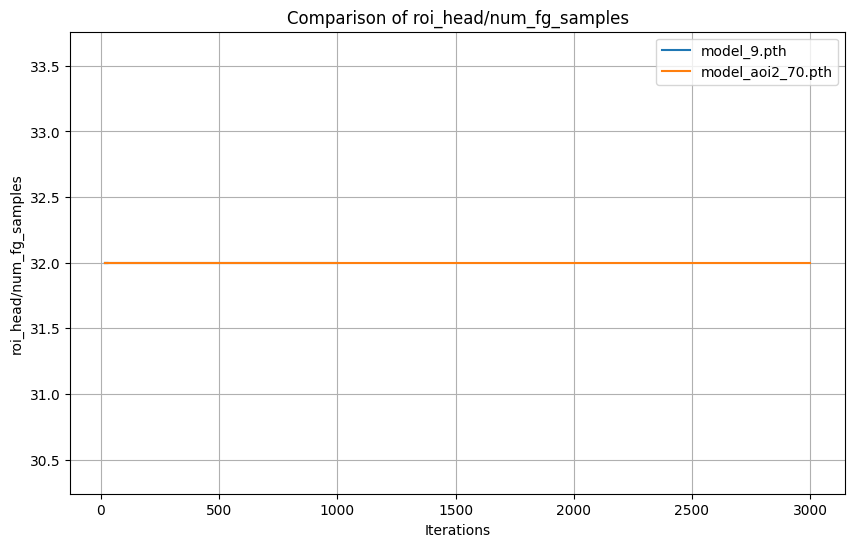

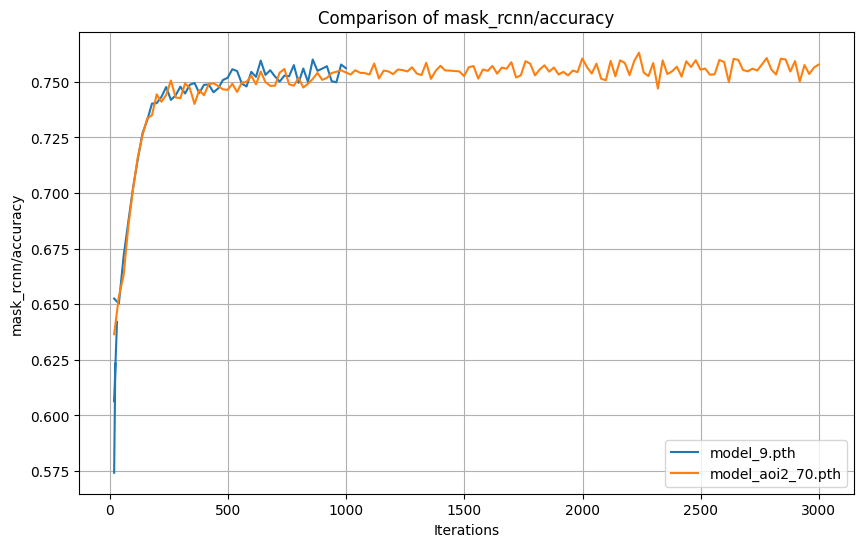

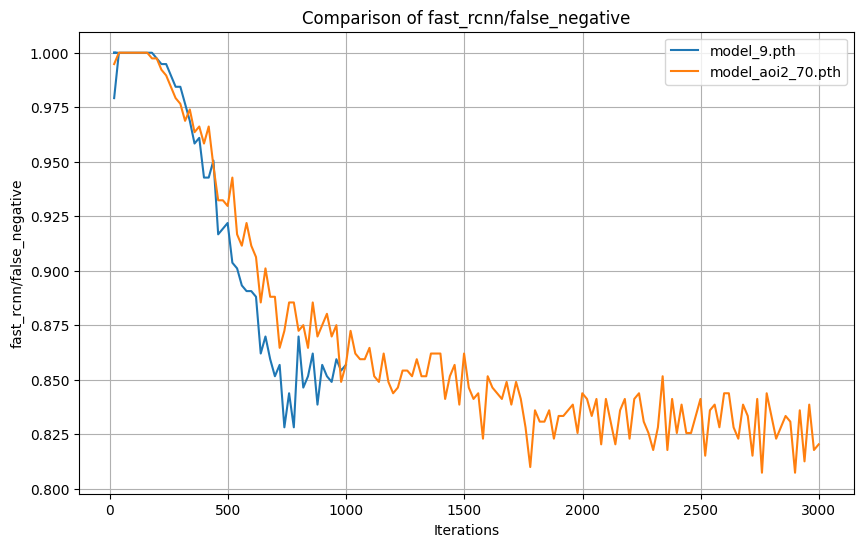

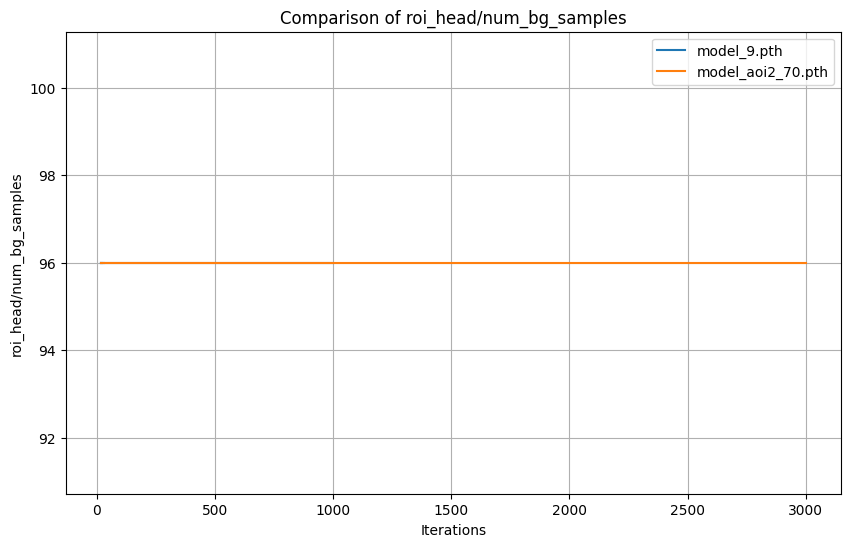

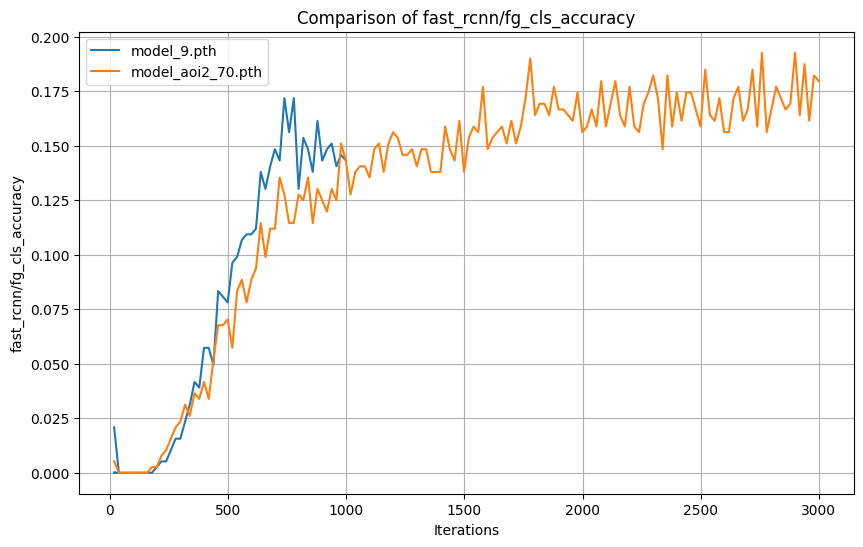

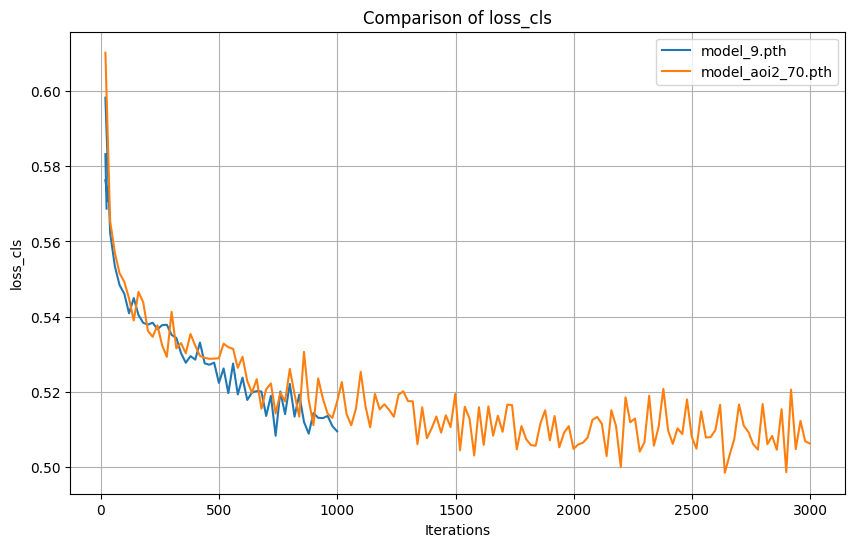

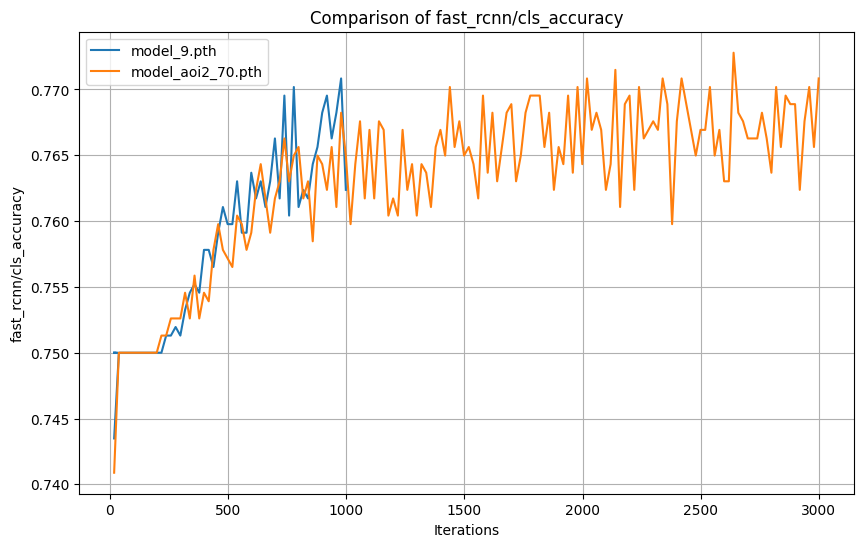

In [4]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Directory containing your metrics.json files
#directory = '/content/drive/MyDrive/data/382_5826_1/models/'
directory = '/content/drive/MyDrive/data/400_5816/models/'


# Detect all metrics.json files
metrics_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('_metrics.json')]

# Dictionary to hold dataframes for each model
df_dict = {}

for file in metrics_files:
    # Extracting model name from the filename (e.g., "model_3.pth")
    model_name = os.path.basename(file).split('_metrics.json')[0]
    with open(file, 'r') as f:
        metrics_data = [json.loads(line) for line in f]
    df = pd.DataFrame(metrics_data)
    df['model'] = model_name  # Add a column for model name
    df_dict[model_name] = df

# Plot each metric for all models
metrics = set(df.columns) - {'iteration', 'model'}  # Exclude non-metric columns
for metric in metrics:
    plt.figure(figsize=(10, 6))
    for model_name, df in df_dict.items():
        if metric in df:
            plt.plot(df['iteration'], df[metric], label=model_name)
    plt.xlabel('Iterations')
    plt.ylabel(metric)
    plt.title(f'Comparison of {metric}')
    plt.legend()
    plt.grid(True)
    plt.show()


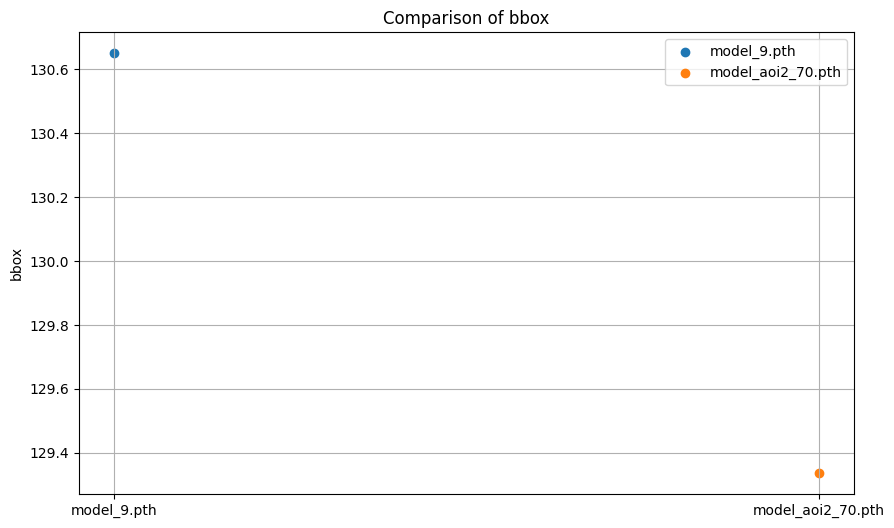

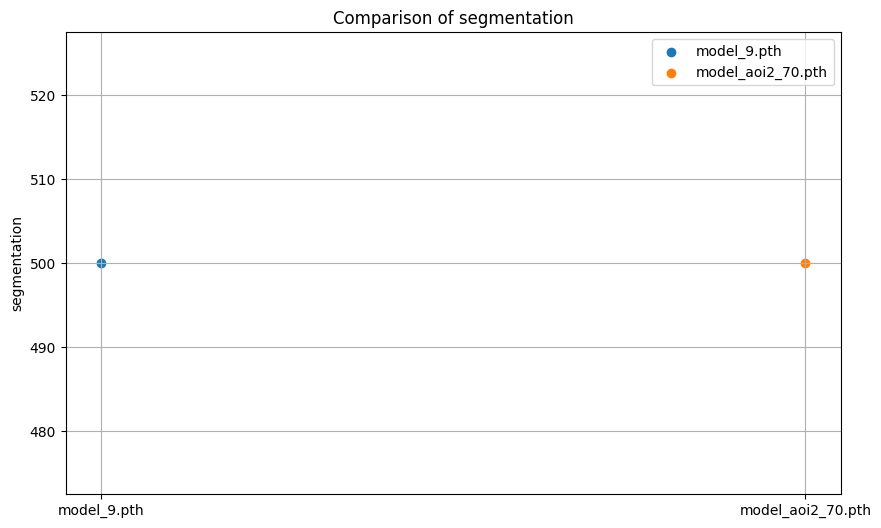

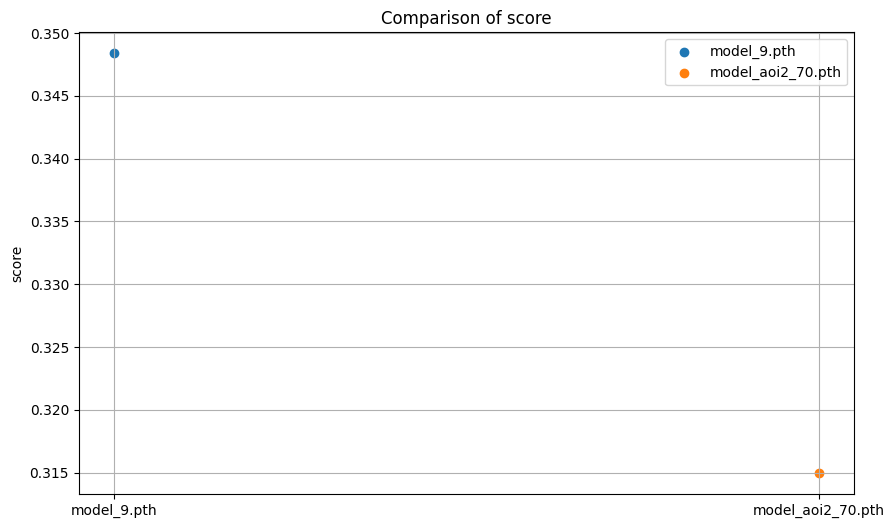

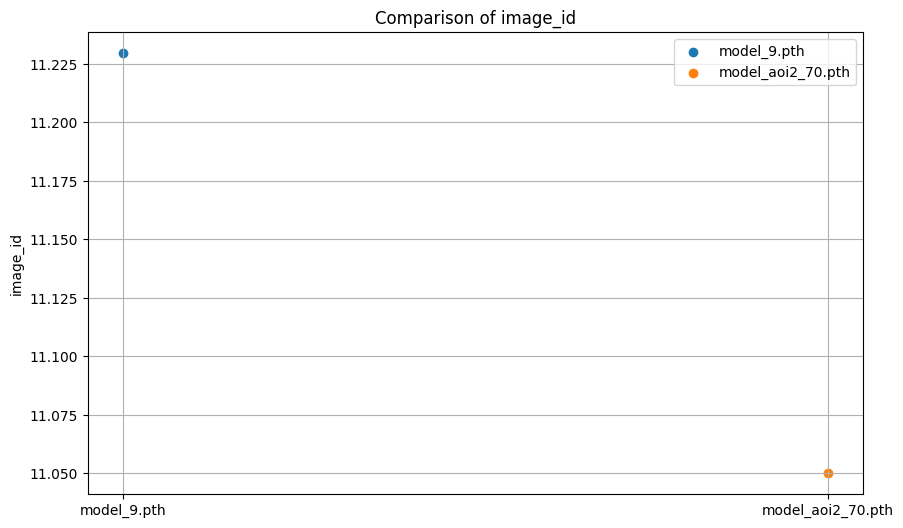

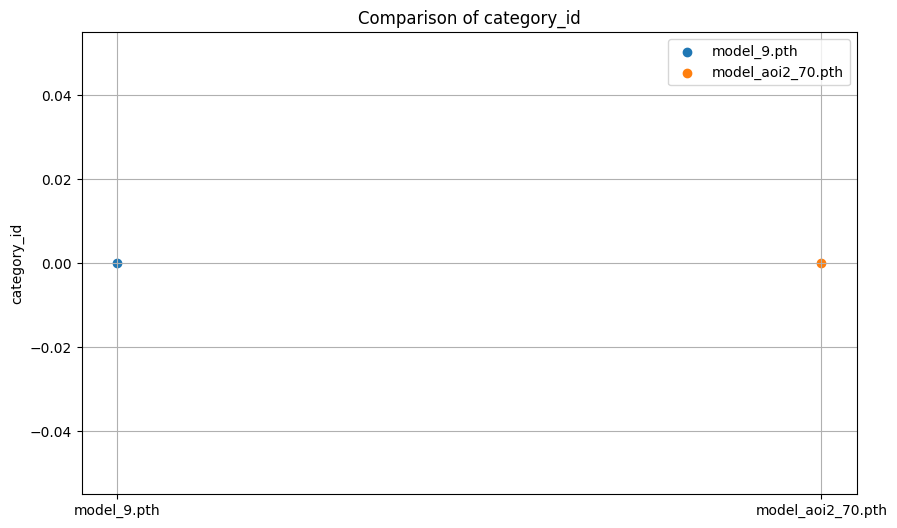

In [5]:
# Detect all coco_instances_results.json files
results_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('_coco_instances_results.json')]

# Dictionary to hold data for each model
results_dict = {}

# Function to flatten and extract numeric values from a nested dictionary/list
def flatten_and_extract(d):
    if isinstance(d, dict):
        for v in d.values():
            yield from flatten_and_extract(v)
    elif isinstance(d, list):
        for item in d:
            yield from flatten_and_extract(item)
    else:
        yield d

# Read each results file and store in results_dict
for file in results_files:
    # Extracting model name from the filename (e.g., "model_4.pth")
    model_name = os.path.basename(file).split('_coco_instances_results.json')[0]
    with open(file, 'r') as f:
        results_data = json.load(f)  # results_data is assumed to be a list

    # Aggregate metrics for each model
    aggregated_metrics = {}
    for entry in results_data:
        for metric, value in entry.items():
            if metric not in aggregated_metrics:
                aggregated_metrics[metric] = []
            aggregated_metrics[metric].extend(flatten_and_extract(value))

    # Average the metrics for simplicity, adjust as needed
    for metric in aggregated_metrics:
        values = [v for v in aggregated_metrics[metric] if isinstance(v, (int, float))]
        if values:
            aggregated_metrics[metric] = sum(values) / len(values)
        else:
            aggregated_metrics[metric] = None  # Or handle as needed
    results_dict[model_name] = aggregated_metrics

# Get a set of all unique metrics across all models
metrics = set()
for model_metrics in results_dict.values():
    metrics.update(model_metrics.keys())

# Plot each metric for all models
for metric in metrics:
    plt.figure(figsize=(10, 6))
    for model_name, model_metrics in results_dict.items():
        if metric in model_metrics and model_metrics[metric] is not None:
            plt.scatter(model_name, model_metrics[metric], label=model_name)
    plt.ylabel(metric)
    plt.title(f'Comparison of {metric}')
    plt.legend()
    plt.grid(True)
    plt.show()
